# Problem Set #3
## Name: Sahithi Adari
### Date: 03/04/2021

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.tree import DecisionTreeClassifier as DTree, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

### Question 1

In [2]:
# Calcuating the entropy of the parent
parent = -(4/9)*math.log((4/9), 2)-(5/9)*math.log((5/9), 2)
parent

0.9910760598382222

The entropy of this collection of training examples with respect to the positive class is 0.99107.

### Question 2

In [3]:
# Calculating the entropy of a_1 true
# The first entropy measure is of the total true positives whereas the second one is of the total false negatives
a1_true = -(3/4)*math.log((3/4), 2)-(1/4)*math.log((1/4), 2)

# Calculating the entropy of a_1 false
# The first entropy measure is of the total false positives whereas the second one is of the total true negatives
a1_false = -(1/5)*math.log((1/5), 2)-(4/5)*math.log((4/5), 2)

# Calculating the weighted entropy of a_1
a1_weighted = (4/9)*a1_true + (5/9)*a1_false

In [4]:
# Calculating the entropy of a_2 true
# The first entropy measure is of the total true positives whereas the second one is of the total false negatives
a2_true = -(2/5)*math.log((2/5), 2)-(3/5)*math.log((3/5), 2)

# Calculating the entropy of a_2 false
# The first entropy measure is of the total false positives whereas the second one is of the total true negatives
a2_false = -(2/4)*math.log((2/4), 2)-(2/4)*math.log((2/4), 2)

# Calculating the weighted entropy of a_2
a2_weighted = (4/9)*a2_true + (5/9)*a2_false

In [5]:
# Information gain of a_1
IG_a1 = parent - a1_weighted

# Outputting the results
IG_a1

0.22943684069673975

In [6]:
# Information gain of a_2
IG_a2 = parent - a2_weighted

# Outputting the results
IG_a2

0.003986906747258434

The information gain of $a_1$ is 0.2294 whereas the information gain of $a_2$ is 0.0039. Because the information gain of $a_1$ is higher, $a_1$ will be considered for splitting.

### Question 3

Through a visual exploration of the $a_3$ values I determined the following split values: 0, 2, 3.5, 4.5, 5.5, 6.5, 7.5, and 8.5. Rather than calculating the information gain for each individual split, like I did above, I decided to create a dataframe that already tabulates the number of '+' and '-' for values that are less than or equal to the split and values that are greater than the split. I also visually inputted the numbers for the *<= (+)*, *<= (-)*, *> (+)*, and *> (-)* columns.

In [7]:
# Created a dataframe of the splitting of contineous attributes
split_contineous = pd.DataFrame(data={'Split Position': [0, 2, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], 
                        '<= (+)': [0, 1, 1, 2, 2, 3, 4, 4],
                        '<= (-)': [0, 0, 1, 1, 3, 3, 4, 5],
                        '> (+)': [4, 3, 3, 2, 2, 1, 0, 0],
                        '> (-)': [5, 5, 4, 4, 2, 2, 1, 0]})

In [8]:
# Outputting the results of the dataframe
split_contineous

,Split Position,<= (+),<= (-),> (+),> (-)
0,0.0,0,0,4,5
1,2.0,1,0,3,5
2,3.5,1,1,3,4
3,4.5,2,1,2,4
4,5.5,2,3,2,2
5,6.5,3,3,1,2
6,7.5,4,4,0,1
7,8.5,4,5,0,0


In [9]:
# Creating a for loop to help calculate the information gain of each split
for i in range(0,8):
    # Saving the denominator based on whether it was less than or greater than the split
    sum_less = split_contineous.iloc[i,1] + split_contineous.iloc[i,2]
    sum_more = split_contineous.iloc[i,3] + split_contineous.iloc[i,4]
    # Preventing the for loop from trying to calculate log(0) by asking it directly assign the value as 0
    if sum_less != 0: 
        try:
            # The entropy equation as above but for the values that are less than the split
            entropy_less = (-(split_contineous.iloc[i,1]/sum_less) * math.log((split_contineous.iloc[i,1]/sum_less), 2)) - ((split_contineous.iloc[i,2]/sum_less) * math.log((split_contineous.iloc[i,2]/sum_less), 2))
        # Preventing the 'ValueError' by telling the for loop to assign the value as 0
        except ValueError:
            entropy_less = 0
    elif sum_less == 0:
        entropy_less = 0
    if sum_more != 0:
        try:
            entropy_more = (-(split_contineous.iloc[i,3]/sum_more) * math.log((split_contineous.iloc[i,3]/sum_more), 2)) - ((split_contineous.iloc[i,4]/sum_more) * math.log((split_contineous.iloc[i,4]/sum_more), 2))
        except ValueError:
            entropy_more = 0
    elif sum_more == 0:
        entropy_more = 0 
    # Calculating the information gain via a weighted entropy
    print({'Split Position': split_contineous.iloc[i,0], 
           'Information Gain': parent - ((sum_less/9) * entropy_less + (sum_more/9) * entropy_more)})

{'Split Position': 0.0, 'Information Gain': 0.0}
{'Split Position': 2.0, 'Information Gain': 0.14269027946047563}
{'Split Position': 3.5, 'Information Gain': 0.0025652873671375698}
{'Split Position': 4.5, 'Information Gain': 0.07278022578373267}
{'Split Position': 5.5, 'Information Gain': 0.007214618474517431}
{'Split Position': 6.5, 'Information Gain': 0.018310781820059074}
{'Split Position': 7.5, 'Information Gain': 0.10218717094933338}
{'Split Position': 8.5, 'Information Gain': 0.0}


According to the above dictionary the best split point is at 2.

### Question 4

The attribute that provides the best split, according to the information gain, is $a_1$.
* $a_1$ information gain of 0.2294
* $a_2$ information gain of 0.0039
* $a_3$ information gain of 0.1426

### Question 5

In [10]:
# Calculating the Gini Index for a_1
# Here 7/9 represents the proporation of classes the a_1 attribute correctly classified 
a1_gini = 1 - ((7/9) ** 2 + (2/9) ** 2)

# Outputting the results 
a1_gini

0.345679012345679

In [11]:
# Calculating the Gini Index for a_1
# Here 7/9 represents the proporation of classes the a_1 attribute correctly classified 
a2_gini = 1 - ((4/9) ** 2 + (5/9) ** 2)

# Outputting the results 
a2_gini

0.49382716049382713

The $a_1$ gini index is 0.3456 whereas the $a_2$ gini index is 0.4938. Based on these values, $a_1$ is still the attribute that provides the best split.

## Part 2

In [12]:
# Reading in the the CSV file
robocall = pd.read_csv('donotcall.csv')

In [13]:
# Viewing the data as a dataframe 
robocall

,caller_phone,violation_date,consumer_area_code,subject,is_robocall
0,9495063579,2020-03-30 14:07:00,858,Other,N
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y
2,8005256699,2020-03-30 18:47:00,619,Other,Y
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y
...,...,...,...,...,...
82053,5412348748,2020-03-26 13:51:00,541,No Subject Provided,N
82054,3213381993,2019-10-01 00:00:00,703,Vacation & timeshares,N
82055,4075658366,2020-03-26 13:54:00,302,Dropped call or no message,Y
82056,8106348601,2020-03-26 16:13:00,248,Dropped call or no message,N


### Question 1

#### Attribute Types

In [14]:
# Listing the datatypes of each attribute
robocall.dtypes

caller_phone          object
violation_date        object
consumer_area_code     int64
subject               object
is_robocall           object
dtype: object

Given that there are only 5 attributes, I will classify all 5 below. 
* *caller_phone* Qualitative, discrete, nominal attribute. The phone number here doesn't really provide any new information outside of distinguishing one value from another. 
* *violation_date* Quantitative, discrete, interval attribute. 
* *consumer_area_code* Qualitative, discrete, nominal attribute. Similar to *caller_phone* in that it doesn't provide any new information outside of distinguishing one value from another. Also important to note that this value is the only one that is an integer type whereas the other 4 attributes are objects. 
* *subject* Qualitative, nominal attribute. I'm unclear on whether text can be classified as discrete or continuous or not. 
* *is_robocall* Quantitative, discrete, binary. Only two values exist: Yes (Y) or No (N).

#### Resolution and possible alternative units of analysis

The current resolution is at a caller phone number, violation date, and robocall status level. I think an alternative unit of analysis could be by *consumer_area_code* which could help tell us if there are specific area codes that more targetted than others, or by violation date to see if there are specific days that are more popular than others.

#### Dimensionality

In [15]:
# Counting the number of attributes (columns)
len(robocall.columns)

5

In [16]:
# Counting the number of oberservations
len(robocall)

82058

There are 5 total attributes and 82058 rows.

#### Missing Values

In [17]:
# Determining the number of missing values per attribute
robocall.isna().sum()

caller_phone          3781
violation_date           0
consumer_area_code       0
subject                  0
is_robocall           6097
dtype: int64

Of the 5 attributes *caller_phone* and *is_robocall* have the most missing values. For *caller_phone*, this is most likely due to the fact that some robocallers, or even regular calls, can come up as "Unknown" or "Private number". I've also seen instances where the number came up as "Scam Likely" which also hides the phone number.

For *is_robocall*, if we take a look at the code book provided by the FTC API, we can see that *is_robocall* tells you whether the complaints were recorded messages or not. If this column has an NaN values it could be assumed that somehow something happened with the call where it wasn't clear whether it was a robocall or not.

### Question 2

In [18]:
# Extracting the first 3 digits of the 'caller_phone' column and saving it as AC
AC = robocall.caller_phone.str.extract(r'(\d{1,3})').squeeze()

# Saving the results of AC into a new dataframe column called 'area_code'
robocall['area_code'] = AC

# Coverting the object class to float type
robocall['area_code'] = robocall.area_code.apply(pd.to_numeric, errors = 'ignore') # Using error 'ignore' to leave NaN values alone

# Creating a new column called 'same_area_code' that compares 'consumer_area_code' and 'area_code'
robocall['same_area_code'] = np.where(robocall.consumer_area_code == robocall.area_code, 1, 0)

# Dropping the column 'area_code'
robocall = robocall.drop('area_code', axis = 1)

### Question 3

In [19]:
# Outputting the the total number of missing values
robocall[robocall.isna().any(axis=1)]

,caller_phone,violation_date,consumer_area_code,subject,is_robocall,same_area_code
28,6193506562,2020-03-30 11:00:00,619,Other,NaN,1
37,2173866296,2020-03-30 10:37:00,217,No Subject Provided,NaN,1
40,2172794294,2020-03-30 14:21:00,217,No Subject Provided,NaN,1
44,NaN,2020-03-31 00:15:00,603,Other,Y,0
54,NaN,2020-03-03 09:43:00,201,"Calls pretending to be government, businesses,...",Y,0
...,...,...,...,...,...,...
81977,6202042755,2020-03-26 15:26:00,620,No Subject Provided,NaN,1
82003,4057259188,2020-03-26 15:00:00,216,Other,NaN,0
82006,2162842747,2020-03-26 15:00:00,216,Other,NaN,1
82038,NaN,2020-03-25 20:30:00,503,No Subject Provided,Y,0


As we can see above, there 9652 rows of missing values. Given that our total dataset contains 82058 rows, losing 9652 rows is a relatively small number. As such, we will move forward with dropping all NaN values.

In [20]:
# Dropping NaN
robocall = robocall.dropna()

In [21]:
robocall

,caller_phone,violation_date,consumer_area_code,subject,is_robocall,same_area_code
0,9495063579,2020-03-30 14:07:00,858,Other,N,0
1,8443555004,2020-03-19 21:46:00,479,No Subject Provided,Y,0
2,8005256699,2020-03-30 18:47:00,619,Other,Y,0
3,9152680729,2020-03-19 17:35:00,479,No Subject Provided,Y,0
4,7186535424,2020-03-19 11:42:00,479,No Subject Provided,Y,0
...,...,...,...,...,...,...
82053,5412348748,2020-03-26 13:51:00,541,No Subject Provided,N,1
82054,3213381993,2019-10-01 00:00:00,703,Vacation & timeshares,N,0
82055,4075658366,2020-03-26 13:54:00,302,Dropped call or no message,Y,0
82056,8106348601,2020-03-26 16:13:00,248,Dropped call or no message,N,0


In [22]:
# Creating a target array of 'is_robocall'
y = robocall['is_robocall']

# Creating a feature matrix of 'subject' and 'same_area_code'
X = robocall.drop(['caller_phone', 'violation_date', 'consumer_area_code', 'is_robocall'], axis=1)

In [23]:
#save the feature name and target variables
X_names = X.columns
labels = y.values

In [24]:
# Encoding target variable values using LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

### Question 4

In [25]:
# Converting the subject variable into dummies for the feature matrix 
X = pd.get_dummies(X, columns=['subject'])

### Question 5

In [26]:
# Intializing the DecisionTreeClassifier
mod = DTree(random_state = 1994)

# Fitting the model
mod.fit(X, y)

DecisionTreeClassifier(random_state=1994)

In [27]:
# Evaluating the performance using five-fold cross-validation
scores = cross_val_score(mod, X, y)

# Printing the mean accuracy score
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.7408


### Question 6

In [28]:
# Splitting the validation into train_scores and test_scores
train_scores, test_scores = validation_curve(mod, X, y, param_name="max_depth", param_range=np.arange(1, 11), cv = 5)

In [29]:
# Generating the means
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

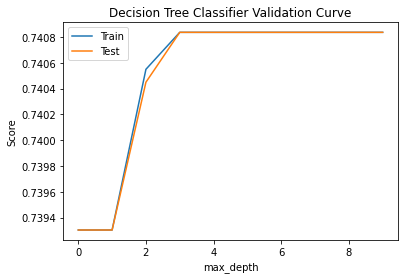

In [30]:
# Plotting the validation curve
fig1 = plt.figure()
plt.plot(train_mean, label='Train')
plt.plot(test_mean, label='Test')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree Classifier Validation Curve')
plt.legend()

# Showing the plot
plt.show()

Given the bias-variance tradeoff of any model, we need to choose the best value that results in the lowest bias (avoiding underfitting) as well as lowest variance (svoiding overfitting). That values, for this specific model, is a `max_depth` of anything above 3 as the model plateaus at that depth.

### Question 7

In [31]:
# Splitting the data into a test and training dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state = 1994)

In [32]:
# Intializing the DecisionTreeClassifier for a max_depth of 3
mod_max = DTree(max_depth = 3, random_state = 1994)

# Fitting the model
mod_max.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, random_state=1994)

In [33]:
# Printing the accuracy score for the test data
print("Accuracy score: {:.4f}".format(mod_max.score(test_X, test_y)))

Accuracy score: 0.7384


### Question 8

In [34]:
# Generating predictions
pred_X = mod_max.predict(test_X)

In [35]:
# Creating a confusion matrix for mod_max
mod_max_matrix = confusion_matrix(test_y, pred_X)

# Turning the matrix into a dataframe
matrix_df = pd.DataFrame(mod_max_matrix)

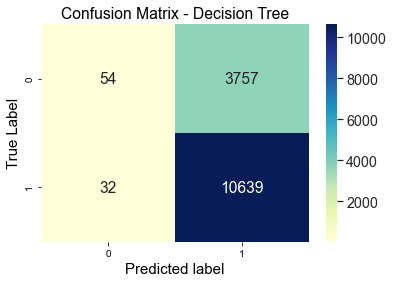

<Figure size 720x504 with 0 Axes>

In [36]:
# Plotting the results
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(matrix_df, annot = True, fmt = "g", ax = ax, cmap = "YlGnBu")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_ylabel("True Label", fontsize = 15)

# Showing the plot
plt.show()

According to the above confusion matrix the classification error that is the most prevelent are false positives (an issue of specificity).

### Question 9

For some reason when I originally tried to `plot_tree` the arrows were not showing up. Google told me it was an error brought on by python interacting with seaborn so I included an `arrow_patch` to draw my arrows.

In [37]:
list(train_X)

['same_area_code',
 'subject_Calls pretending to be government, businesses, or family and friends',
 'subject_Charities',
 'subject_Computer  & technical support',
 'subject_Debt collection',
 'subject_Dropped call or no message',
 'subject_Energy, solar,  & utilities',
 'subject_Home improvement  & cleaning',
 'subject_Home security  & alarms',
 'subject_Lotteries, prizes  & sweepstakes',
 'subject_Medical  & prescriptions',
 'subject_No Subject Provided',
 'subject_Other',
 'subject_Reducing your debt (credit cards, mortgage, student loans)',
 'subject_Vacation  & timeshares',
 'subject_Warranties  & protection plans',
 'subject_Work from home  & other ways to make money']

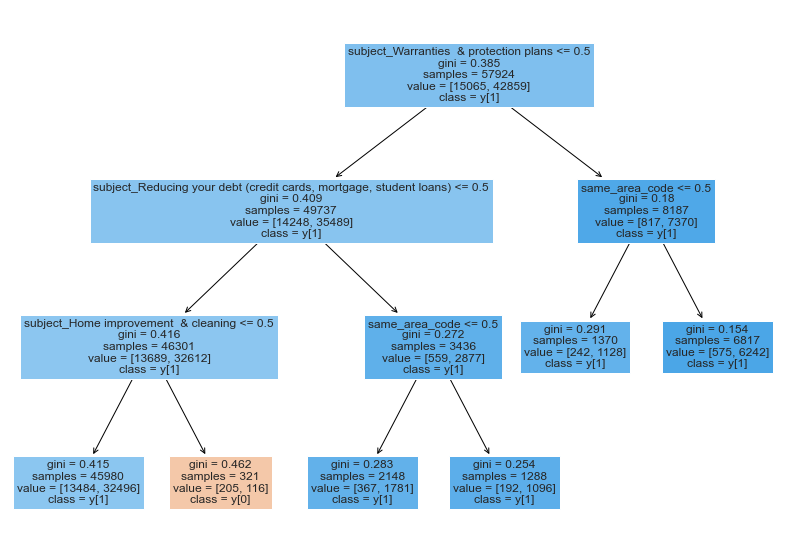

In [38]:
# Visualizing the tree 
plt.figure(figsize=(14, 10))
# Saving the plot_tree as a variable in order to add arrows
out = plot_tree(mod_max, filled = True, feature_names = list(train_X), fontsize = 12, class_names = True)

# Creating a for loop to add arrows to my decision tree
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

In [39]:
# Calculating feature importance
pd.DataFrame({'Feature': test_X.columns, 'Importance': mod_max.feature_importances_})

,Feature,Importance
0,same_area_code,0.028885
1,"subject_Calls pretending to be government, bus...",0.000000
2,subject_Charities,0.000000
3,subject_Computer & technical support,0.000000
4,subject_Debt collection,0.000000
5,subject_Dropped call or no message,0.000000
6,"subject_Energy, solar, & utilities",0.000000
7,subject_Home improvement & cleaning,0.108750
8,subject_Home security & alarms,0.000000
9,"subject_Lotteries, prizes & sweepstakes",0.000000


* The root of this tree contains 57924 observations of the *subject_Warranties  & protection plans <= 0.5* variable meaning that it is the the largest value amongst all other independent variables.
  * Given that we are dealing with all binary variables, if the variable is `<= 0.5` this can be interpreted to mean `== 0`.
* Given that our validation curve stated that the ideal `max_depth` is 3, the decision tree was pruned/preprocessed to that depth.
* In the above model, *subject_Warranties  & protection plans* has the highest feature importance weight.